# Weather Analysis

Martín Singla - Data Analyst 

### 0.0 - Project Description
As per known by common sense and scientific evidence, the closer we get to Earth´s Equator, the hotter average temperatures get due to proximity to the Sun. In this project we will try to prove taht fact through data and statistical evidence. We will generate a random sample of cities across the globe, with their geographic coordinates, and we will get the current meteorological data for each of those cities. Subsequently, we will run a regression analysis to check the statistical relationship between those meteorological variables and proximity to the Equator.  

We will use API ......

### 0.1 - Libraries & API keys

In [64]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress

#API keys
from api_keys import weather_key

### 1.1 - Identification of Cities

In [31]:
#Generating list of cities to analyze

#Citipy library finds city name nearest to a specified geo-coord
#Usage explained by authors in: https://github.com/wingchen/citipy
from citipy import citipy 

#Getting geo-coords sample
np.random.seed(99) #setting seed to get same results as running the script multiple times

#Minimum and Maxium Latitud in the World: -90º to 90º
lat_samp = np.random.uniform(low= -90, high= 90, size= 10000)
#Minimum and Maxium Longitude in the World: -180º to 180
lng_samp = np.random.uniform(low= -180, high= 180, size= 10000)

#Searching for city names
city_names = []
country_codes = []
for i in range(0, 10000):
    a = citipy.nearest_city(lat_samp[i], lng_samp[i])
    city_names.append(a.city_name)
    country_codes.append(a.country_code)
len(city_names) #10000 city names matched

#removing duplicated cities
unique_cities = []
unique_lat = []
unique_lng = []
unique_country= []

for i in range(0, 10000):
    if city_names[i] not in unique_cities:
        unique_cities.append(city_names[i])
        unique_lat.append(lat_samp[i])
        unique_lng.append(lat_samp[i])
        unique_country.append(country_codes[i])

#creating dataframe
df = pd.DataFrame({
    "City" : unique_cities, "Country_code" : unique_country,
    "Lat" : unique_lat, "Lng" : unique_lng
})        

print(f'{len(df)} unique cities identified')  #2286 unique cities

2286 unique cities identified


### 1.2 - Meteorological Data Gathering

In [35]:
#Gathering Meteorological data through OpenWeather API
#Documentation available in: https://openweathermap.org/current
#The task requires us to get values in Imperial System 

df["Temperature (F)"] = ''
df["Humidity (%)"] = ''
df["Cloudiness (%)"] = ''
df["Wind Speed (mph)"] = ''
df["Preassure"] = ''
df["Sea Level (ft)"] = ''

#Looping over df to find city temperatures
for i in range(0, len(df)):
    
    #querying
    print(f'ID {i}: Querying city: {df.iloc[i,0]}') 
    url = f'http://api.openweathermap.org/data/2.5/weather?q={df.iloc[i,0]}&appid={weather_key}&units=imperial'
    response = requests.get(url)
    response = response.json()
    
    try:
        #Assingning to df
        df.iloc[i, 4] = response["main"]["temp"] 
        df.iloc[i, 5] = response["main"]["humidity"] 
        df.iloc[i, 6] = response["clouds"]["all"] 
        df.iloc[i, 7] = response["wind"]["speed"] 
        df.iloc[i, 8] = response["main"]["pressure"] 
        df.iloc[i, 9] = response["main"]["sea_level"] 
    
    except:
        print(f'(!!) Some information not found for city {df.iloc[i,0]}')
        pass
    
    print("-----------------------------------------------")

#Cleaning df
df = df.replace("", float("NaN"))
df = df.dropna(subset= ["Temperature (F)"])

#Saving raw df
df.to_csv("results/global_city_weather_df.csv", index= False)

df.head()

ID 0: Querying city: los llanos de aridane
Some information not found for city los llanos de aridane
-----------------------------------------
ID 1: Querying city: rungata
Some information not found for city rungata
-----------------------------------------
ID 2: Querying city: paamiut
-----------------------------------------
ID 3: Querying city: mataura
Some information not found for city mataura
-----------------------------------------
ID 4: Querying city: arman
-----------------------------------------
ID 5: Querying city: hilo
Some information not found for city hilo
-----------------------------------------
ID 6: Querying city: rikitea
-----------------------------------------
ID 7: Querying city: hobart
Some information not found for city hobart
-----------------------------------------
ID 8: Querying city: dikson
-----------------------------------------
ID 9: Querying city: albany
Some information not found for city albany
-----------------------------------------
ID 10: Quer

Some information not found for city meadow lake
-----------------------------------------
ID 84: Querying city: pangkalanbuun
-----------------------------------------
ID 85: Querying city: dubbo
Some information not found for city dubbo
-----------------------------------------
ID 86: Querying city: miyako
-----------------------------------------
ID 87: Querying city: mandalgovi
-----------------------------------------
ID 88: Querying city: sorland
-----------------------------------------
ID 89: Querying city: olafsvik
-----------------------------------------
ID 90: Querying city: arrecife
Some information not found for city arrecife
-----------------------------------------
ID 91: Querying city: saleaula
Some information not found for city saleaula
-----------------------------------------
ID 92: Querying city: stephenville
Some information not found for city stephenville
-----------------------------------------
ID 93: Querying city: kaniv
---------------------------------------

Some information not found for city mar del plata
-----------------------------------------
ID 164: Querying city: kawalu
-----------------------------------------
ID 165: Querying city: hambantota
Some information not found for city hambantota
-----------------------------------------
ID 166: Querying city: khatanga
-----------------------------------------
ID 167: Querying city: wielun
Some information not found for city wielun
-----------------------------------------
ID 168: Querying city: mecca
-----------------------------------------
ID 169: Querying city: brigantine
Some information not found for city brigantine
-----------------------------------------
ID 170: Querying city: leshukonskoye
-----------------------------------------
ID 171: Querying city: toyooka
Some information not found for city toyooka
-----------------------------------------
ID 172: Querying city: taoudenni
-----------------------------------------
ID 173: Querying city: jumla
------------------------------

Some information not found for city tsihombe
-----------------------------------------
ID 246: Querying city: phonhong
Some information not found for city phonhong
-----------------------------------------
ID 247: Querying city: monze
-----------------------------------------
ID 248: Querying city: severo-kurilsk
-----------------------------------------
ID 249: Querying city: thompson
Some information not found for city thompson
-----------------------------------------
ID 250: Querying city: takoradi
-----------------------------------------
ID 251: Querying city: moctezuma
-----------------------------------------
ID 252: Querying city: chagda
Some information not found for city chagda
-----------------------------------------
ID 253: Querying city: katsuura
Some information not found for city katsuura
-----------------------------------------
ID 254: Querying city: ribeira grande
-----------------------------------------
ID 255: Querying city: mbandaka
-----------------------------

Some information not found for city kuching
-----------------------------------------
ID 330: Querying city: gaoual
-----------------------------------------
ID 331: Querying city: wanxian
-----------------------------------------
ID 332: Querying city: bilibino
-----------------------------------------
ID 333: Querying city: georgetown
Some information not found for city georgetown
-----------------------------------------
ID 334: Querying city: anuppur
-----------------------------------------
ID 335: Querying city: darnah
-----------------------------------------
ID 336: Querying city: constitucion
-----------------------------------------
ID 337: Querying city: port blair
-----------------------------------------
ID 338: Querying city: bibiani
-----------------------------------------
ID 339: Querying city: fukue
Some information not found for city fukue
-----------------------------------------
ID 340: Querying city: rocha
-----------------------------------------
ID 341: Querying

-----------------------------------------
ID 417: Querying city: monte patria
-----------------------------------------
ID 418: Querying city: jiddah
Some information not found for city jiddah
-----------------------------------------
ID 419: Querying city: prieska
-----------------------------------------
ID 420: Querying city: naples
Some information not found for city naples
-----------------------------------------
ID 421: Querying city: rosetta
Some information not found for city rosetta
-----------------------------------------
ID 422: Querying city: kuche
Some information not found for city kuche
-----------------------------------------
ID 423: Querying city: tilichiki
-----------------------------------------
ID 424: Querying city: omboue
-----------------------------------------
ID 425: Querying city: bungoma
-----------------------------------------
ID 426: Querying city: san cristobal
Some information not found for city san cristobal
----------------------------------------

Some information not found for city boljarovo
-----------------------------------------
ID 503: Querying city: acapulco
-----------------------------------------
ID 504: Querying city: sorvag
Some information not found for city sorvag
-----------------------------------------
ID 505: Querying city: lethem
-----------------------------------------
ID 506: Querying city: arlington
Some information not found for city arlington
-----------------------------------------
ID 507: Querying city: ausa
Some information not found for city ausa
-----------------------------------------
ID 508: Querying city: noshiro
Some information not found for city noshiro
-----------------------------------------
ID 509: Querying city: ahipara
-----------------------------------------
ID 510: Querying city: ban nahin
-----------------------------------------
ID 511: Querying city: bara
-----------------------------------------
ID 512: Querying city: severomorsk
Some information not found for city severomorsk
-

Some information not found for city kitakata
-----------------------------------------
ID 588: Querying city: liniere
Some information not found for city liniere
-----------------------------------------
ID 589: Querying city: warqla
Some information not found for city warqla
-----------------------------------------
ID 590: Querying city: rio grande
Some information not found for city rio grande
-----------------------------------------
ID 591: Querying city: leshan
-----------------------------------------
ID 592: Querying city: belgrade
Some information not found for city belgrade
-----------------------------------------
ID 593: Querying city: mporokoso
-----------------------------------------
ID 594: Querying city: mizdah
-----------------------------------------
ID 595: Querying city: sfantu gheorghe
Some information not found for city sfantu gheorghe
-----------------------------------------
ID 596: Querying city: san patricio
Some information not found for city san patricio
--

Some information not found for city nouakchott
-----------------------------------------
ID 669: Querying city: west bay
Some information not found for city west bay
-----------------------------------------
ID 670: Querying city: jiangyou
-----------------------------------------
ID 671: Querying city: phan rang
Some information not found for city phan rang
-----------------------------------------
ID 672: Querying city: taldan
-----------------------------------------
ID 673: Querying city: havoysund
Some information not found for city havoysund
-----------------------------------------
ID 674: Querying city: mango
Some information not found for city mango
-----------------------------------------
ID 675: Querying city: port-gentil
-----------------------------------------
ID 676: Querying city: hobyo
-----------------------------------------
ID 677: Querying city: pousat
Some information not found for city pousat
-----------------------------------------
ID 678: Querying city: zabay

Some information not found for city careiro da varzea
-----------------------------------------
ID 753: Querying city: jaguaruna
-----------------------------------------
ID 754: Querying city: kurilsk
-----------------------------------------
ID 755: Querying city: martfu
Some information not found for city martfu
-----------------------------------------
ID 756: Querying city: gravdal
-----------------------------------------
ID 757: Querying city: petrolandia
Some information not found for city petrolandia
-----------------------------------------
ID 758: Querying city: three hills
-----------------------------------------
ID 759: Querying city: velsk
-----------------------------------------
ID 760: Querying city: gravelbourg
Some information not found for city gravelbourg
-----------------------------------------
ID 761: Querying city: gasa
Some information not found for city gasa
-----------------------------------------
ID 762: Querying city: muana
------------------------------

Some information not found for city varhaug
-----------------------------------------
ID 841: Querying city: tocopilla
-----------------------------------------
ID 842: Querying city: valdivia
Some information not found for city valdivia
-----------------------------------------
ID 843: Querying city: petropavlovsk-kamchatskiy
Some information not found for city petropavlovsk-kamchatskiy
-----------------------------------------
ID 844: Querying city: makaha
Some information not found for city makaha
-----------------------------------------
ID 845: Querying city: sabang
-----------------------------------------
ID 846: Querying city: tebingtinggi
Some information not found for city tebingtinggi
-----------------------------------------
ID 847: Querying city: strezhevoy
Some information not found for city strezhevoy
-----------------------------------------
ID 848: Querying city: talah
Some information not found for city talah
-----------------------------------------
ID 849: Querying 

Some information not found for city olinda
-----------------------------------------
ID 923: Querying city: haljala
-----------------------------------------
ID 924: Querying city: makakilo city
Some information not found for city makakilo city
-----------------------------------------
ID 925: Querying city: bahir dar
-----------------------------------------
ID 926: Querying city: monte alegre de minas
Some information not found for city monte alegre de minas
-----------------------------------------
ID 927: Querying city: beatrice
Some information not found for city beatrice
-----------------------------------------
ID 928: Querying city: jaumave
Some information not found for city jaumave
-----------------------------------------
ID 929: Querying city: labutta
Some information not found for city labutta
-----------------------------------------
ID 930: Querying city: darhan
-----------------------------------------
ID 931: Querying city: joshimath
-----------------------------------

-----------------------------------------
ID 1006: Querying city: konstantinovka
-----------------------------------------
ID 1007: Querying city: yambio
-----------------------------------------
ID 1008: Querying city: bharatpur
-----------------------------------------
ID 1009: Querying city: sabya
Some information not found for city sabya
-----------------------------------------
ID 1010: Querying city: luchegorsk
-----------------------------------------
ID 1011: Querying city: auburn
Some information not found for city auburn
-----------------------------------------
ID 1012: Querying city: dakoro
-----------------------------------------
ID 1013: Querying city: baruun-urt
-----------------------------------------
ID 1014: Querying city: kenora
Some information not found for city kenora
-----------------------------------------
ID 1015: Querying city: ayolas
-----------------------------------------
ID 1016: Querying city: touros
Some information not found for city touros
--------

-----------------------------------------
ID 1092: Querying city: castlemaine
Some information not found for city castlemaine
-----------------------------------------
ID 1093: Querying city: woudrichem
Some information not found for city woudrichem
-----------------------------------------
ID 1094: Querying city: kimbe
-----------------------------------------
ID 1095: Querying city: inuvik
Some information not found for city inuvik
-----------------------------------------
ID 1096: Querying city: cumra
Some information not found for city cumra
-----------------------------------------
ID 1097: Querying city: wanning
-----------------------------------------
ID 1098: Querying city: samut songkhram
Some information not found for city samut songkhram
-----------------------------------------
ID 1099: Querying city: klenovyy
-----------------------------------------
ID 1100: Querying city: orsk
Some information not found for city orsk
-----------------------------------------
ID 1101: Qu

-----------------------------------------
ID 1175: Querying city: hanyang
-----------------------------------------
ID 1176: Querying city: khonsa
-----------------------------------------
ID 1177: Querying city: mackay
Some information not found for city mackay
-----------------------------------------
ID 1178: Querying city: miramar
Some information not found for city miramar
-----------------------------------------
ID 1179: Querying city: safwah
Some information not found for city safwah
-----------------------------------------
ID 1180: Querying city: sumbawanga
-----------------------------------------
ID 1181: Querying city: ashqelon
Some information not found for city ashqelon
-----------------------------------------
ID 1182: Querying city: hassleholm
Some information not found for city hassleholm
-----------------------------------------
ID 1183: Querying city: cayenne
Some information not found for city cayenne
-----------------------------------------
ID 1184: Querying city

Some information not found for city viana
-----------------------------------------
ID 1258: Querying city: chiredzi
-----------------------------------------
ID 1259: Querying city: cartagena
Some information not found for city cartagena
-----------------------------------------
ID 1260: Querying city: konya
Some information not found for city konya
-----------------------------------------
ID 1261: Querying city: dixon
Some information not found for city dixon
-----------------------------------------
ID 1262: Querying city: anton lizardo
Some information not found for city anton lizardo
-----------------------------------------
ID 1263: Querying city: baihar
-----------------------------------------
ID 1264: Querying city: niederkassel
Some information not found for city niederkassel
-----------------------------------------
ID 1265: Querying city: japura
-----------------------------------------
ID 1266: Querying city: kirillov
Some information not found for city kirillov
---------

Some information not found for city tomiya
-----------------------------------------
ID 1344: Querying city: chokwe
-----------------------------------------
ID 1345: Querying city: arnhem
Some information not found for city arnhem
-----------------------------------------
ID 1346: Querying city: tahara
Some information not found for city tahara
-----------------------------------------
ID 1347: Querying city: warwick
Some information not found for city warwick
-----------------------------------------
ID 1348: Querying city: waitara
Some information not found for city waitara
-----------------------------------------
ID 1349: Querying city: shepsi
-----------------------------------------
ID 1350: Querying city: cedar city
Some information not found for city cedar city
-----------------------------------------
ID 1351: Querying city: north battleford
Some information not found for city north battleford
-----------------------------------------
ID 1352: Querying city: atasu
-----------

-----------------------------------------
ID 1428: Querying city: arkhipo-osipovka
-----------------------------------------
ID 1429: Querying city: ossora
-----------------------------------------
ID 1430: Querying city: balclutha
Some information not found for city balclutha
-----------------------------------------
ID 1431: Querying city: kontagora
-----------------------------------------
ID 1432: Querying city: ranfurly
Some information not found for city ranfurly
-----------------------------------------
ID 1433: Querying city: mayskiy
Some information not found for city mayskiy
-----------------------------------------
ID 1434: Querying city: kungurtug
-----------------------------------------
ID 1435: Querying city: diffa
-----------------------------------------
ID 1436: Querying city: mnogovershinnyy
-----------------------------------------
ID 1437: Querying city: vryburg
-----------------------------------------
ID 1438: Querying city: balakhta
-----------------------------

Some information not found for city sheksna
-----------------------------------------
ID 1511: Querying city: maningrida
-----------------------------------------
ID 1512: Querying city: shingu
Some information not found for city shingu
-----------------------------------------
ID 1513: Querying city: shanhetun
-----------------------------------------
ID 1514: Querying city: dharchula
-----------------------------------------
ID 1515: Querying city: turayf
Some information not found for city turayf
-----------------------------------------
ID 1516: Querying city: broken hill
Some information not found for city broken hill
-----------------------------------------
ID 1517: Querying city: tomatlan
-----------------------------------------
ID 1518: Querying city: doha
Some information not found for city doha
-----------------------------------------
ID 1519: Querying city: bakel
-----------------------------------------
ID 1520: Querying city: milkovo
------------------------------------

Some information not found for city enumclaw
-----------------------------------------
ID 1596: Querying city: llata
-----------------------------------------
ID 1597: Querying city: sawtell
Some information not found for city sawtell
-----------------------------------------
ID 1598: Querying city: benguela
-----------------------------------------
ID 1599: Querying city: balimo
Some information not found for city balimo
-----------------------------------------
ID 1600: Querying city: hayden
Some information not found for city hayden
-----------------------------------------
ID 1601: Querying city: chipinge
-----------------------------------------
ID 1602: Querying city: elhovo
Some information not found for city elhovo
-----------------------------------------
ID 1603: Querying city: coihaique
Some information not found for city coihaique
-----------------------------------------
ID 1604: Querying city: ikwiriri
-----------------------------------------
ID 1605: Querying city: arag

-----------------------------------------
ID 1680: Querying city: gleisdorf
Some information not found for city gleisdorf
-----------------------------------------
ID 1681: Querying city: azul
Some information not found for city azul
-----------------------------------------
ID 1682: Querying city: camargo
-----------------------------------------
ID 1683: Querying city: guiglo
-----------------------------------------
ID 1684: Querying city: naron
Some information not found for city naron
-----------------------------------------
ID 1685: Querying city: copiapo
Some information not found for city copiapo
-----------------------------------------
ID 1686: Querying city: borovoy
Some information not found for city borovoy
-----------------------------------------
ID 1687: Querying city: borgarnes
Some information not found for city borgarnes
-----------------------------------------
ID 1688: Querying city: mapastepec
-----------------------------------------
ID 1689: Querying city: stor

-----------------------------------------
ID 1765: Querying city: barra do garcas
-----------------------------------------
ID 1766: Querying city: deep river
Some information not found for city deep river
-----------------------------------------
ID 1767: Querying city: vestmanna
Some information not found for city vestmanna
-----------------------------------------
ID 1768: Querying city: stromness
Some information not found for city stromness
-----------------------------------------
ID 1769: Querying city: manzhouli
-----------------------------------------
ID 1770: Querying city: plavsk
-----------------------------------------
ID 1771: Querying city: awbari
-----------------------------------------
ID 1772: Querying city: tapes
-----------------------------------------
ID 1773: Querying city: san luis
-----------------------------------------
ID 1774: Querying city: imeni poliny osipenko
-----------------------------------------
ID 1775: Querying city: tasbuget
Some information n

-----------------------------------------
ID 1850: Querying city: andros town
Some information not found for city andros town
-----------------------------------------
ID 1851: Querying city: lishan
-----------------------------------------
ID 1852: Querying city: sicamous
Some information not found for city sicamous
-----------------------------------------
ID 1853: Querying city: llanes
Some information not found for city llanes
-----------------------------------------
ID 1854: Querying city: grand-santi
-----------------------------------------
ID 1855: Querying city: turmalina
-----------------------------------------
ID 1856: Querying city: dinkelsbuhl
Some information not found for city dinkelsbuhl
-----------------------------------------
ID 1857: Querying city: puunsi
Some information not found for city puunsi
-----------------------------------------
ID 1858: Querying city: serebryansk
Some information not found for city serebryansk
-----------------------------------------
I

-----------------------------------------
ID 1936: Querying city: mandera
-----------------------------------------
ID 1937: Querying city: winston-salem
Some information not found for city winston-salem
-----------------------------------------
ID 1938: Querying city: tyazhinskiy
-----------------------------------------
ID 1939: Querying city: indramayu
-----------------------------------------
ID 1940: Querying city: wajima
Some information not found for city wajima
-----------------------------------------
ID 1941: Querying city: shangrao
-----------------------------------------
ID 1942: Querying city: tsumeb
-----------------------------------------
ID 1943: Querying city: muzhi
-----------------------------------------
ID 1944: Querying city: velikiy ustyug
-----------------------------------------
ID 1945: Querying city: bennettsville
Some information not found for city bennettsville
-----------------------------------------
ID 1946: Querying city: tulum
-----------------------

-----------------------------------------
ID 2023: Querying city: dibaya
Some information not found for city dibaya
-----------------------------------------
ID 2024: Querying city: davila
Some information not found for city davila
-----------------------------------------
ID 2025: Querying city: aransas pass
Some information not found for city aransas pass
-----------------------------------------
ID 2026: Querying city: aksha
-----------------------------------------
ID 2027: Querying city: thinadhoo
-----------------------------------------
ID 2028: Querying city: maumere
-----------------------------------------
ID 2029: Querying city: vanimo
-----------------------------------------
ID 2030: Querying city: hwange
-----------------------------------------
ID 2031: Querying city: bukene
-----------------------------------------
ID 2032: Querying city: duz
Some information not found for city duz
-----------------------------------------
ID 2033: Querying city: navapur
Some informatio

Some information not found for city pitimbu
-----------------------------------------
ID 2106: Querying city: peno
-----------------------------------------
ID 2107: Querying city: oxford
Some information not found for city oxford
-----------------------------------------
ID 2108: Querying city: campbell river
Some information not found for city campbell river
-----------------------------------------
ID 2109: Querying city: muisne
-----------------------------------------
ID 2110: Querying city: quijingue
-----------------------------------------
ID 2111: Querying city: sao sebastiao
-----------------------------------------
ID 2112: Querying city: laurel
Some information not found for city laurel
-----------------------------------------
ID 2113: Querying city: andrelandia
-----------------------------------------
ID 2114: Querying city: puerto madryn
-----------------------------------------
ID 2115: Querying city: buchanan
Some information not found for city buchanan
--------------

-----------------------------------------
ID 2193: Querying city: minusinsk
Some information not found for city minusinsk
-----------------------------------------
ID 2194: Querying city: port antonio
Some information not found for city port antonio
-----------------------------------------
ID 2195: Querying city: sao mateus do maranhao
-----------------------------------------
ID 2196: Querying city: skalistyy
Some information not found for city skalistyy
-----------------------------------------
ID 2197: Querying city: stabat
Some information not found for city stabat
-----------------------------------------
ID 2198: Querying city: kendari
-----------------------------------------
ID 2199: Querying city: hrob
-----------------------------------------
ID 2200: Querying city: zachary
Some information not found for city zachary
-----------------------------------------
ID 2201: Querying city: boden
Some information not found for city boden
-----------------------------------------
ID 2

Some information not found for city kosonsoy
-----------------------------------------
ID 2273: Querying city: balasinor
Some information not found for city balasinor
-----------------------------------------
ID 2274: Querying city: mandiana
-----------------------------------------
ID 2275: Querying city: howard springs
Some information not found for city howard springs
-----------------------------------------
ID 2276: Querying city: san martin jilotepeque
Some information not found for city san martin jilotepeque
-----------------------------------------
ID 2277: Querying city: portalegre
Some information not found for city portalegre
-----------------------------------------
ID 2278: Querying city: papiu ilarian
Some information not found for city papiu ilarian
-----------------------------------------
ID 2279: Querying city: santo domingo suchitepequez
Some information not found for city santo domingo suchitepequez
-----------------------------------------
ID 2280: Querying city: 

,City,Country_code,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Preassure,Sea Level (ft)
0,los llanos de aridane,es,31.010141,31.010141,64.40,59.0,0.0,8.05,1013.0,NaN
2,paamiut,gl,58.589131,58.589131,36.43,79.0,100.0,3.74,1029.0,1029.0
3,mataura,pf,-84.339650,-84.339650,55.99,92.0,97.0,14.00,1018.0,NaN
4,arman,ru,55.448993,55.448993,38.03,64.0,14.0,1.25,1019.0,1019.0
5,hilo,us,11.811136,11.811136,74.10,61.0,90.0,4.61,1015.0,NaN


### 2.1 - Meteorological Data vs. Latitude Visualization 

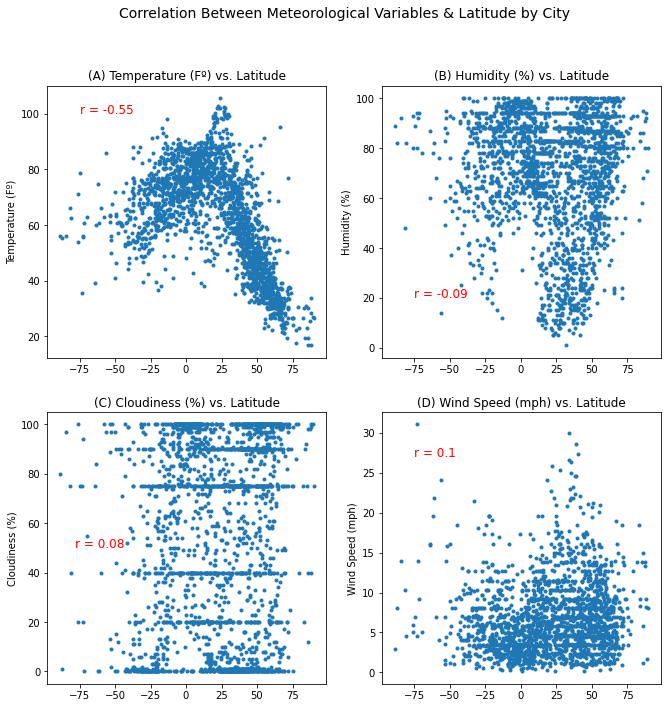

In [122]:
#Scatter-plots for multiple variables

fig1, axs = plt.subplots(2,2, figsize=(11,11))
fig1.suptitle("Correlation Between Meteorological Variables & Latitude by City", size= 14)

axs[0,0].scatter(df.loc[:,"Lat"], df.loc[:,"Temperature (F)"], marker= ".")
axs[0,0].set_title("(A) Temperature (Fº) vs. Latitude")
axs[0,0].set_ylabel("Temperature (Fº)")
axs[0,0].text(-75, 100, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Temperature (F)"])[0,1],2)}', color= "red", fontsize= 12)

axs[0,1].scatter(df.loc[:,"Lat"], df.loc[:,"Humidity (%)"], marker= ".")
axs[0,1].set_title("(B) Humidity (%) vs. Latitude")
axs[0,1].set_ylabel("Humidity (%)")
axs[0,1].text(-75, 20, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Humidity (%)"])[0,1],2)}', color= "red", fontsize= 12)

axs[1,0].scatter(df.loc[:,"Lat"], df.loc[:,"Cloudiness (%)"], marker= ".")
axs[1,0].set_title("(C) Cloudiness (%) vs. Latitude")
axs[1,0].set_ylabel("Cloudiness (%)")
axs[1,0].text(-78, 50, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Cloudiness (%)"])[0,1],2)}', color= "red", fontsize= 12)

axs[1,1].scatter(df.loc[:,"Lat"], df.loc[:,"Wind Speed (mph)"], marker= ".")
axs[1,1].set_title("(D) Wind Speed (mph) vs. Latitude")
axs[1,1].set_ylabel("Wind Speed (mph)")
axs[1,1].text(-75, 27, f'r = {round(np.corrcoef(df.loc[:,"Lat"], df.loc[:,"Wind Speed (mph)"])[0,1],2)}', color= "red", fontsize= 12)

plt.show()

###### _2.1.A - Temperature vs. Latitude_
There seems to be a correlation between Latitude and Temperature. The Pearson's correlation coefficient indicated a -0.52 relationship between both variables. However, from a simple look at the scatter plot we can see that the correlation is not Linear. Higher temperature (Fº) values are concentrated arround the 0º Latitude. As we move towards negative and positive Latitude values, the temperature drops. Lower temperature city recors are concentrated in positive Latitude values, while temperature doesn't fall below 40ºF (aprox.) in negative Latitude values. This is clearly because our sample of cities has more records North of the Equator (Central and North America, Europe, North Africa, Middle East Asia), than south of the Equator (South America, South Africa and Australia). Most of the urban agglomerations are in the global north. 

While the relationship doesn't seem to be Linear, there is clearly a statistically significant relationship that potentially could be modelled though a Polynomial model. _(e.g.:  Temp = b0 + b1* Lat + b2 * Lat^2 + b3 * Lat^3)_ Another alternative could be breaking down the series into two models (north and south hemisfere) or making a square transformation to Latitude variable (to turn all values positive).

###### _2.1.B -  - Humidity vs. Latitidue_
There is a very low negative correlation between both variables (Pearson's r = -0.1). Ther seems to be a very large concentration of observations in high humidity around 0º Latitude. This is consistent with common knowledge (countries like Ecuador, Colombia, Congo or Malaysia are close to the Equator and have tropical climate)

The relationship is not linear, and either way we can't run a simple regression model with % data as a dependent variable (since fitted values can't be lower than 0 and higher than 100). A potential approach could be using a Generalized linear modeles like a Probit or Logit transformation.

###### _2.1.C - Cloudiness vs. Latitude_
There is also a very low correlation between both variables (Pearsons's r = 0.08). Again, the relationship is not linear, and either way we can't run a simple regression model with % data as a dependent variable (since fitted values can't be lower than 0 and higher than 100). A potential approach could be using a Generalized linear modeles like a Probit or Logit transformation.

######  _2.1.D - Wind Speed vs. Latitude_
Ther doesn't seem to be any clearly visible linear correlation (Pearson's r= 0.1). However we can see that there is a big concentration of low wind speeds around the 0º latitude. Potentially the figure could be modeled through a Polynomial function or would show better results if we remove negative symbol from observations in South hemisphere.


In [113]:
## Saving graphs as .png
fig1.savefig("results/meteorological_variables_vs_Latitude.png")

### 2.2 - Regression Analysis 

###### 2.2.A - Temperature vs. Latitude - Lineal Regression

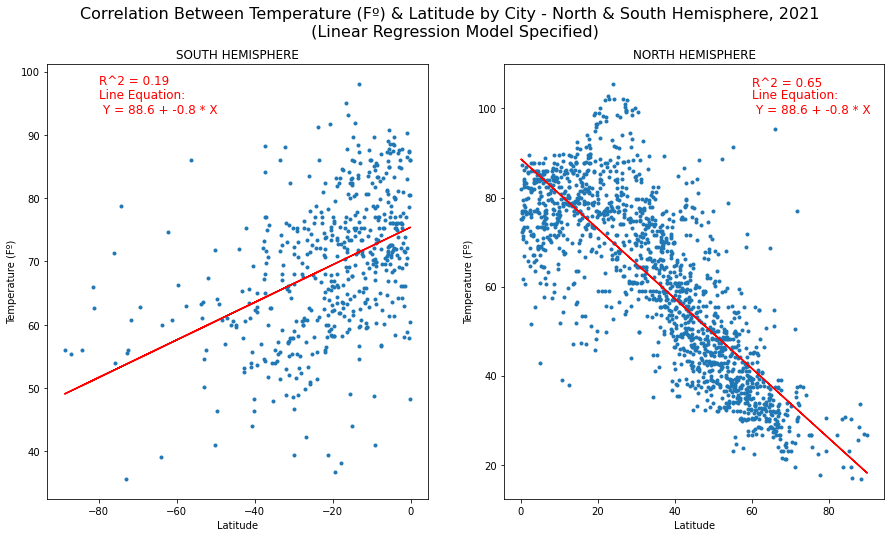

In [123]:
#Breaking df into North and South Hemisphere
df_north = df.loc[df["Lat"] >= 0,:]
df_south = df.loc[df["Lat"] < 0,:]

#Temp vs. Lat linear regressions
lm1_north = linregress(x= df_north["Lat"], 
                       y= df_north["Temperature (F)"])
lm1_north_fitted = lm1_north[1] + lm1_north[0] * df_north["Lat"]
lm1_south = linregress(x= df_south["Lat"], 
                       y= df_south["Temperature (F)"])
lm1_south_fitted = lm1_south[1] + lm1_south[0] * df_south["Lat"]

#Plotting temperature vs. latitude correlations
fig2, axs = plt.subplots(1,2, figsize=(15,8))
fig2.suptitle("Correlation Between Temperature (Fº) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Temperature (F)"], marker= ".")
axs[1].plot(df_north["Lat"], lm1_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Temperature (Fº)")
axs[1].set_xlabel("Latitude")
axs[1].text(60, 105, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Temperature (F)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(60, 99, f'Line Equation: \n Y = {round(lm1_north[1],1)} + {round(lm1_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Temperature (F)"], marker= ".")
axs[0].plot(df_south["Lat"], lm1_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Temperature (Fº)")
axs[0].set_xlabel("Latitude")
axs[0].text(-80, 98, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Temperature (F)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-80, 93.5, f'Line Equation: \n Y = {round(lm1_north[1],1)} + {round(lm1_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

There is a strong negative correlation between Latitude and and Temperature at the North Hemisphere cities. The R^2 value for the fitted regressiongoes up to 0.65. Most importantly, Latitude is statistically significant with a P-value of near 0. With a multiple linear regrssion model which included other variables like Altitude or Cloudiness, we could potentially explain a big portion of the variability of Temperature in relationship to Latitude. 

On contrast, the South Hemisphere city dataset presents a very weak linear regression fit, with an R^2 of less than 0.19. The sample is smaller and the observations are largely scattered. The Latitude variable is not statistically significant (p-value = 9.04), so we can't rule out the Null hypothesis of no correlation between Lat and Temp. Probably the simple linear model is not the best to predict temperatures in the Southern Hemisphere.

Now we find the challenge of unifying both North and South datasets into one and building an unified regression model which can predict Temperature behaviour across the globe. As mentioned above, a Polynomial model could be tried. Other variables could be included in as a multiple regression model too.

######  2.2.B -  Humidity vs. Latitude - Lineal Regression

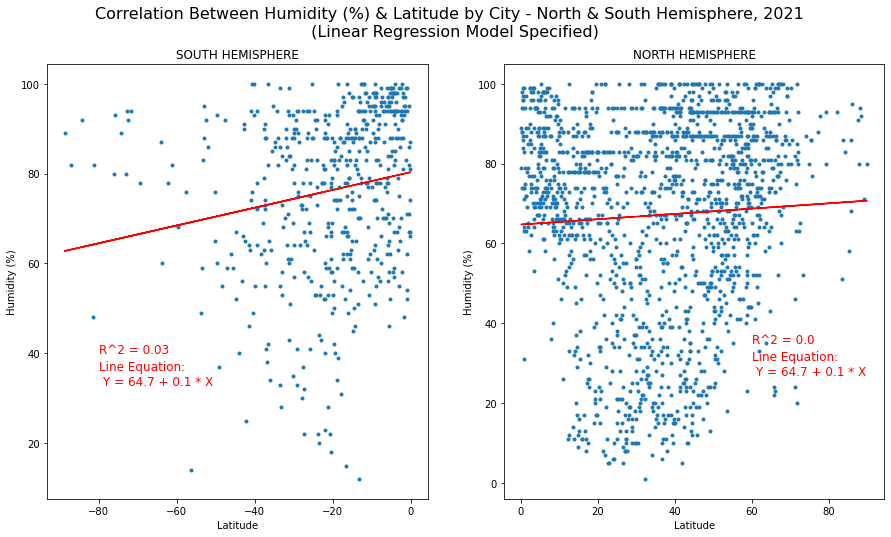

In [129]:
#Humid vs. Lat linear regressions
lm2_north = linregress(x= df_north["Lat"], 
                       y= df_north["Humidity (%)"])
lm2_north_fitted = lm2_north[1] + lm2_north[0] * df_north["Lat"]
lm2_south = linregress(x= df_south["Lat"], 
                       y= df_south["Humidity (%)"])
lm2_south_fitted = lm2_south[1] + lm2_south[0] * df_south["Lat"]

#Plotting humidity vs. latitude correlations
fig3, axs = plt.subplots(1,2, figsize=(15,8))
fig3.suptitle("Correlation Between Humidity (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Humidity (%)"], marker= ".")
axs[1].plot(df_north["Lat"], lm2_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Humidity (%)")
axs[1].set_xlabel("Latitude")
axs[1].text(60, 35, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Humidity (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(60, 27, f'Line Equation: \n Y = {round(lm2_north[1],1)} + {round(lm2_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Humidity (%)"], marker= ".")
axs[0].plot(df_south["Lat"], lm2_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Humidity (%)")
axs[0].set_xlabel("Latitude")
axs[0].text(-80, 40, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Humidity (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-80, 33, f'Line Equation: \n Y = {round(lm2_north[1],1)} + {round(lm2_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

Absolute no linear correlation between Latitude and Humidity (%) either for North or South hemisphere. First of all, this model shouldn't be linear, since the dependent variable (Humidity) is in percentage units and can only have values from 0 to 100. Therefore a transformation is needed. For example, possibly, a logit model which assumes values from 0 to 1. Secondly, there seems to be a large amount of observations concentrated around 0 Lat degrees for both North and South hemispheres. It would be interesting to see a model that puts together both series and tries to caputre this phenomenon.

######  2.2.C -  Cloudiness vs. Latitude - Lineal Regression

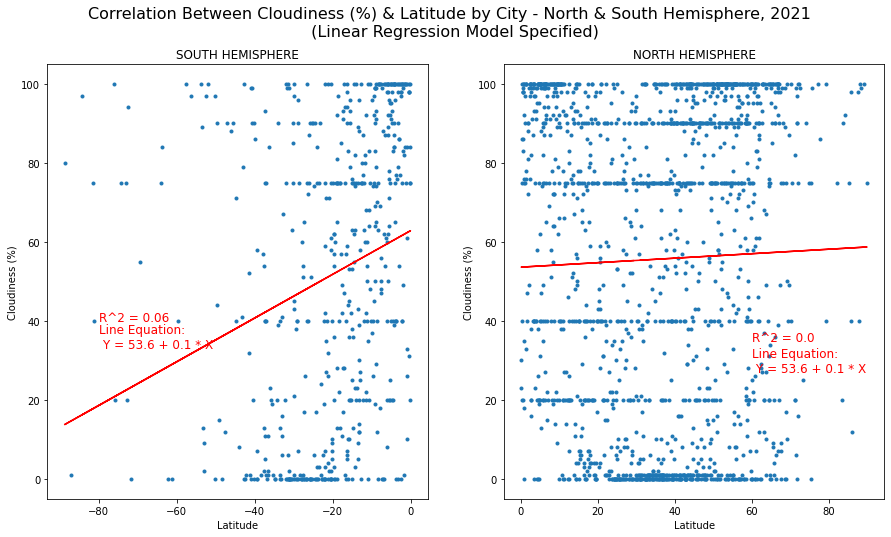

In [130]:
#Cloudiness vs. Lat linear regressions
lm3_north = linregress(x= df_north["Lat"], 
                       y= df_north["Cloudiness (%)"])
lm3_north_fitted = lm3_north[1] + lm3_north[0] * df_north["Lat"]
lm3_south = linregress(x= df_south["Lat"], 
                       y= df_south["Cloudiness (%)"])
lm3_south_fitted = lm3_south[1] + lm3_south[0] * df_south["Lat"]

#Plotting cloudiness vs. latitude correlations
fig4, axs = plt.subplots(1,2, figsize=(15,8))
fig4.suptitle("Correlation Between Cloudiness (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Cloudiness (%)"], marker= ".")
axs[1].plot(df_north["Lat"], lm3_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Cloudiness (%)")
axs[1].set_xlabel("Latitude")
axs[1].text(60, 35, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Cloudiness (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(60, 27, f'Line Equation: \n Y = {round(lm3_north[1],1)} + {round(lm3_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Cloudiness (%)"], marker= ".")
axs[0].plot(df_south["Lat"], lm3_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Cloudiness (%)")
axs[0].set_xlabel("Latitude")
axs[0].text(-80, 40, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Cloudiness (%)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-80, 33, f'Line Equation: \n Y = {round(lm3_north[1],1)} + {round(lm3_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

There is absolutely no linear relationship whatsoever again in those two graphs. The graphical representation of the lines are the result of a highly unstable model. R^2 for both North and South is near 0, implying poor model fit. Most importanly, none are statistically significant. Dependent variables in percentage units can't be properly modeled with a simple linear regression, we need some other transformation to capture if there is a relationship between Cloudiness and Latitude.

######  2.2.C -  Wind Speed  vs. Latitude - Lineal Regression

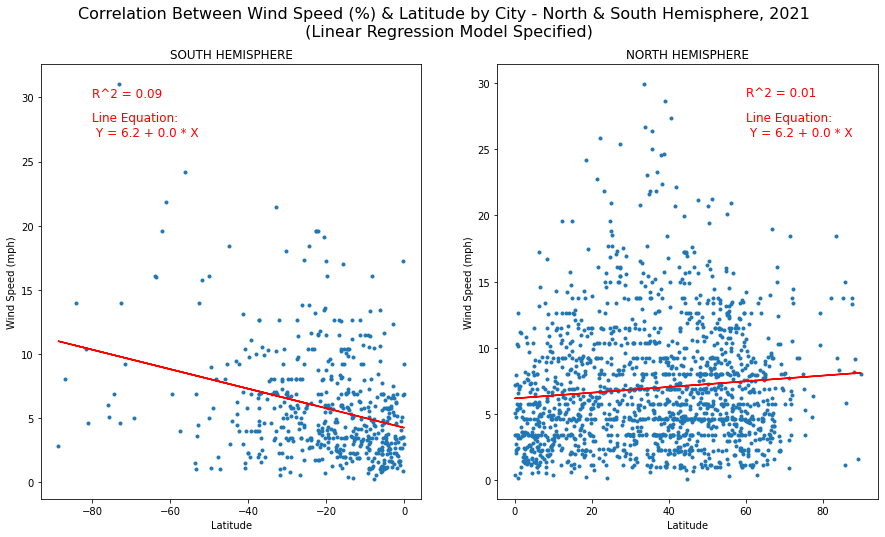

In [135]:
#Wind Speed vs. Lat linear regressions
lm4_north = linregress(x= df_north["Lat"], 
                       y= df_north["Wind Speed (mph)"])
lm4_north_fitted = lm4_north[1] + lm4_north[0] * df_north["Lat"]
lm4_south = linregress(x= df_south["Lat"], 
                       y= df_south["Wind Speed (mph)"])
lm4_south_fitted = lm4_south[1] + lm4_south[0] * df_south["Lat"]

#Plotting Wind Speed vs. latitude correlations
fig5, axs = plt.subplots(1,2, figsize=(15,8))
fig5.suptitle("Correlation Between Wind Speed (%) & Latitude by City - North & South Hemisphere, 2021 \n (Linear Regression Model Specified)", fontsize= 16)
axs[1].scatter(df_north.loc[:,"Lat"], df_north.loc[:,"Wind Speed (mph)"], marker= ".")
axs[1].plot(df_north["Lat"], lm4_north_fitted, color= "red")
axs[1].set_title("NORTH HEMISPHERE")
axs[1].set_ylabel("Wind Speed (mph)")
axs[1].set_xlabel("Latitude")
axs[1].text(60, 29, f'R^2 = {round((np.corrcoef(df_north.loc[:,"Lat"], df_north.loc[:,"Wind Speed (mph)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[1].text(60, 26, f'Line Equation: \n Y = {round(lm4_north[1],1)} + {round(lm4_north[0],1)} * X', color= "red", fontsize= 12)

axs[0].scatter(df_south.loc[:,"Lat"], df_south.loc[:,"Wind Speed (mph)"], marker= ".")
axs[0].plot(df_south["Lat"], lm4_south_fitted, color= "red")
axs[0].set_title("SOUTH HEMISPHERE")
axs[0].set_ylabel("Wind Speed (mph)")
axs[0].set_xlabel("Latitude")
axs[0].text(-80, 30, f'R^2 = {round((np.corrcoef(df_south.loc[:,"Lat"], df_south.loc[:,"Wind Speed (mph)"])[0,1])**2,2)}', color= "red", fontsize= 12)
axs[0].text(-80, 27, f'Line Equation: \n Y = {round(lm4_north[1],1)} + {round(lm4_north[0],1)} * X', color= "red", fontsize= 12)
plt.show()

The figures would suggest that the closer we get to the Equator, the slower observed wind speed gets, both for North and South hemisphere models. However, both models are statistically very poor, the goodness of fit (R^2) are of 0.09 and 0.01. In the case of North hemisphere the p-value is statistically sifnificant, however, in the case of South hemisphere it is not. The impact of Latitude in Wind Speed is very little in the case of North hemisphere. This may imply that there is are missing variables not specified in the model which could explain with a better fit the nature of the relationship. 

It would be interesting to test a polynomial or other type of model which could potentially capture the behaviour of this relationship including both North and South datasets. 

In [138]:
#Saving figures
fig2.savefig("results/temperature_vs_Latitude_regression.png")
fig3.savefig("results/humidity_variables_vs_Latitude_regression.png")
fig4.savefig("results/cloudiness_variables_vs_Latitude_regression.png")
fig5.savefig("results/windspeed_variables_vs_Latitude_regression.png")